<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/Reinforcement_Learning/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install swig
!pip install gym[box2d]
!pip install ray[rllib]
!pip install renderlab

    reset:
        This method is used to reset the environment to its initial state. It's typically called at the beginning of an episode or whenever you want to start a new simulation.

    step:
        The step method is used to advance the simulation by one time step. It takes an action as input, processes the environment dynamics, and returns the new state, reward, and other information.

    render:
        The render method is used to visualize the current state of the environment. It's helpful for debugging and understanding how your agent interacts with the environment. However, note that rendering might not be necessary for training, and some environments can be run without visualization.

Action Space
There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

Observation Space
The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

In [ ]:
import matplotlib.pyplot as plt
import gymnasium as gym
import ray
from ray.rllib.algorithms.ppo import PPOConfig

In [ ]:
ray.shutdown ()
ray.init ()

config = PPOConfig()
config.use_critic= True
config.use_gae = True
config.lambda_ = 0.95
config.use_kl_loss = True
config.sgd_minibatch_size =32
config.num_sgd_iter = 30
config.shuffle_sequences = True
config.vf_loss_coeff = 0.5
config.entropy_coeff = 0.001
config.clip_param = 0.2

agent = config.environment('LunarLander-v2').framework(framework ='tf').build()
agent.get_policy().model.base_model.summary (expand_nested=True)

2023-12-18 17:37:23,711	INFO worker.py:1673 -- Started a local Ray instance.
/usr/local/lib/python3.10/dist-packages/ray/rllib/algorithms/algorithm.py:484: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/usr/local/lib/python3.10/dist-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
/usr/local/lib/python3.10/dist-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 observations (InputLayer)   [(None, 8)]                  0         []                            
                                                                                                  
 fc_1 (Dense)                (None, 256)                  2304      ['observations[0][0]']        
                                                                                                  
 fc_value_1 (Dense)          (None, 256)                  2304      ['observations[0][0]']        
                                                                                                  
 fc_2 (Dense)                (None, 256)                  65792     ['fc_1[0][0]']                
                                                                                              

Iteration 1, Average Rewards: -172.55434469397358
Iteration 2, Average Rewards: -167.7786721789678
Iteration 3, Average Rewards: -155.3502764783689
Iteration 4, Average Rewards: -139.36606711067563
Iteration 5, Average Rewards: -132.13601424670708
Iteration 6, Average Rewards: -121.93501478778403
Iteration 7, Average Rewards: -103.34188934692226
Iteration 8, Average Rewards: -85.11679579959497
Iteration 9, Average Rewards: -68.3481583496564
Iteration 10, Average Rewards: -53.95665930386476
Iteration 11, Average Rewards: -50.66739340241608
Iteration 12, Average Rewards: -47.984981033716686
Iteration 13, Average Rewards: -41.25863284877606
Iteration 14, Average Rewards: -32.523174808147914
Iteration 15, Average Rewards: -31.9494259601465
Iteration 16, Average Rewards: -26.231964230198933
Iteration 17, Average Rewards: -17.48745716761956
Iteration 18, Average Rewards: -12.721771418089837
Iteration 19, Average Rewards: -11.58113820801016
Iteration 20, Average Rewards: -5.776719386345116
It

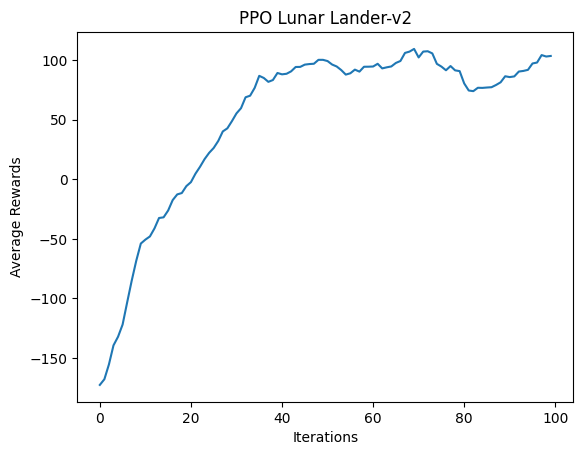

In [ ]:
train_iterations = 100
average_rewards_per_iteration = []

for i in range (train_iterations):
  log = agent.train()
  average_rewards = log['sampler_results']['episode_reward_mean']
  average_rewards_per_iteration.append(average_rewards)

  print (f'Iteration {i+1}, Average Rewards: {average_rewards}')


plt.plot(average_rewards_per_iteration)
plt.title('PPO Lunar Lander-v2')
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.show ()

We can see that the model is training because the rewards are going higher as the iterations go forward

In [ ]:
import renderlab as rl

env = gym.make("LunarLander-v2", render_mode="rgb_array")
env = rl.RenderFrame  (env, "./output")

observation , info = env.reset ()

while True:
  action = env.action_space.sample ()
  observation, reward, terminated, truncated, info = env.step (action)

  if terminated or truncated:
    break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  85%|████████▌ | 102/120 [00:00<00:00, 262.57it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1702923955.241336.mp4, 720000 bytes wanted but 0 bytes read,at frame 119/120, at time 3.97/3.97 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4
